In [1]:
# %pip install torch
# %pip install tensorflow
# %pip install opencv-python
# %pip install numpy
# %pip install matplotlib

In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
# X_train_path = "DOTAv1\\images\\train"
# Y_train_path = "DOTAv1\\labels\\train"
# X_val_path = "DOTAv1\\images\\val"
# Y_val_path = "DOTAv1\\labels\\val"
# X_test_path = "DOTAv1\\images\\test"

# X_train = os.listdir(X_train_path)
# Y_train = os.listdir(Y_train_path)


# X_val = os.listdir(X_val_path)
# Y_val = os.listdir(Y_val_path)
# X_test = os.listdir(X_test_path)
# # print(len(X_train), len(Y_train))
# # print(len(X_val), len(Y_val))
# # print(len(X_test))

# print(len(X_train))
# print(len(Y_train))

input_folder = "DOTAv1\\images\\train"
output_folder = "DOTAv1\\preprocessed_images\\train"
input_labels_folder = "DOTAv1\\labels\\train"
output_labels_folder = "DOTAv1\\preprocessed_labels\\train"


In [3]:
input_folder = "DOTAv1\\images\\train"
output_folder = "DOTAv1\\preprocessed_images\\train"
input_labels_folder = "DOTAv1\\labels\\train"
output_labels_folder = "DOTAv1\\preprocessed_labels\\train"

os.makedirs(output_folder, exist_ok=True)
# os.makedirs(output_labels_folder, exist_ok=True)

def resize_image(input_path, output_path, target_size=(400, 400)):
    try:
        img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
        previous_size = img.shape[0]

        resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
        resized_img = resized_img.reshape((400, 400, 1))
        # resized_img = resized_img.astype(np.float32) / 255.0
        cv2.imwrite(output_path, resized_img)
        print(resized_img.shape)
        
        # print(f"Processed {input_path} and {input_label_path}")
    
    except Exception as e:
        print(f"Error processing {input_path}: {e}")



In [4]:
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg"):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        label_file_name = filename.replace(".jpg", ".txt")
        input_label_path = os.path.join(input_labels_folder, label_file_name)
        output_label_path = os.path.join(output_labels_folder, label_file_name)
        
        resize_image(input_path, output_path)

(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 

In [7]:
def data_load(output_folder, input_labels_folder):
    X = []
    Y = []
    
    # Determine the maximum number of labels
    max_labels = 0
    for file in os.listdir(output_folder):
        if file.endswith('.jpg'):
            label_file = file.replace('.jpg', '.txt')
            label_path = os.path.join(input_labels_folder, label_file)
            
            with open(label_path, 'r') as f:
                lines = f.readlines()
                max_labels = max(max_labels, len(lines))
    
    for file in os.listdir(output_folder):
        if file.endswith('.jpg'):
            img_path = os.path.join(output_folder, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = img.astype(np.float32) / 255.0 

            label_file = file.replace('.jpg', '.txt')
            label_path = os.path.join(input_labels_folder, label_file)
            
            # Initialize with class 15 and coordinates as 0
            labels = np.zeros((max_labels, 9), dtype=np.float32)
            labels[:, 0] = 15  # Set class to 15 for all rows
            
            with open(label_path, 'r') as f:
                lines = f.readlines()
                for i, line in enumerate(lines):
                    if i >= max_labels:
                        break
                    parts = line.strip().split()
                    labels[i] = np.array(parts, dtype=np.float32)
            
            X.append(img)
            Y.append(labels)
    
    X = np.array(X)
    print(f"Number of images: {len(X)}")
    X = np.expand_dims(X, axis=-1)  # Add channel dimension
    Y = np.array(Y)
    
    # Convert to TensorFlow tensors
    X = tf.convert_to_tensor(X, dtype=tf.float32)
    Y = tf.convert_to_tensor(Y, dtype=tf.float32)
    
    # Create TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    
    return dataset, max_labels



In [6]:
# Usage
dataset, max_labels = data_load(output_folder, input_labels_folder)

# You can then use this dataset directly or apply further transformations

# Example of checking the dataset
for image, labels in dataset.take(1):
    print("Image shape:", image.shape)
    print("Labels shape:", labels.shape)
    print("Sample labels:")
    print(pd.DataFrame(labels).tail())

Number of images: 1411
Image shape: (400, 400, 1)
Labels shape: (1939, 9)
Sample labels:
         0    1    2    3    4    5    6    7    8
1934  15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1935  15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1936  15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1937  15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1938  15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0


0 [568.3616, 590.6583999999999, 596.232, 579.0968] [350.1272, 346.7832, 358.8512, 363.79519999999997]


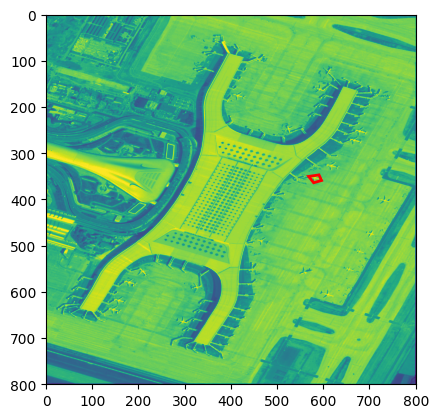

In [ ]:
# model = tf.keras.Model(inputs = inputs, outputs = ["classifier_head", "regressor_head"])
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.image as mpimg
import os
image = os.path.join(output_folder, os.listdir(output_folder)[0])
img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

text_file = os.listdir(output_folder)[0].replace(".jpg", ".txt")

coords_x = []
coords_y = []
with open(os.path.join(input_labels_folder, text_file), "r") as f:
    line = f.readlines()[0]
    line = line.split()
    label = line[0]
    coords_x = [float(elt) * 800 for elt in line[1:9:2]]
    coords_y = [float(elt) * 800 for elt in line[2:9:2]]

print(label, coords_x, coords_y)


# Define the coordinates of the polygon

points = list(zip(coords_x, coords_y))

# Load the image
image_path = image  # Replace with your image path
img = mpimg.imread(image_path)

# Create a new figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

# Create the polygon and add it to the plot
polygon = Polygon(points, closed=True, fill=None, edgecolor='r', linewidth=2)
ax.add_patch(polygon)

# Set the x and y axis limits to show the entire image
ax.set_xlim(0, img.shape[1])
ax.set_ylim(img.shape[0], 0)

# Show the plot
plt.show()

In [9]:
def one_hot_encoding(image, labels, max_labels, num_classes=16):
    # Convert class IDs to integers and apply one-hot encoding
    class_ids = tf.cast(labels[:, 0], tf.int32)
    one_hot_classes = tf.one_hot(class_ids, num_classes)
    
    # Extract bounding box coordinates
    bounding_boxes = labels[:, 1:]
    
    # Combine one-hot encoded classes with bounding box coordinates
    paddings_class = [[0, max_labels - tf.shape(one_hot_classes)[0]], [0, 0]]
    paddings_box = [[0, max_labels - tf.shape(bounding_boxes)[0]], [0, 0]]
    
    one_hot_classes_padded = tf.pad(one_hot_classes, paddings_class, constant_values=0)
    bounding_boxes_padded = tf.pad(bounding_boxes, paddings_box, constant_values=0)  # Changed from -1 to 0
    
    return image, (one_hot_classes_padded, bounding_boxes_padded)

def tune_training_ds(dataset, batch_size=16):
    dataset = dataset.shuffle(1024, reshuffle_each_iteration=True)
    dataset = dataset.repeat()  # The dataset will be repeated indefinitely.
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

# Assume dataset and max_labels are obtained from data_load function
dataset, max_labels = data_load(output_folder, input_labels_folder)

# Apply the one-hot encoding to the dataset
one_hot_encoded_dataset = dataset.map(
    lambda x, y: one_hot_encoding(x, y, max_labels=max_labels, num_classes=16)
)

# Prepare the final training dataset
train_dataset = tune_training_ds(one_hot_encoded_dataset)

# Print information about the dataset
for image, labels in train_dataset.take(1):
    print("Image shape:", image.shape)
    print("One-hot encoded classes shape:", labels[0].shape)
    print("Bounding boxes shape:", labels[1].shape)
    print("First one-hot encoded class:", labels[0][0][0])
    print("First bounding box:", labels[1][0][0])

Number of images: 1411
Image shape: (16, 400, 400, 1)
One-hot encoded classes shape: (16, 1939, 16)
Bounding boxes shape: (16, 1939, 8)
First one-hot encoded class: tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.], shape=(16,), dtype=float32)
First bounding box: tf.Tensor([0.468   0.28925 0.51875 0.283   0.523   0.2975  0.4675  0.3045 ], shape=(8,), dtype=float32)


In [10]:
valid_input_images = "DOTAv1\\images\\val"
valid_output_images = "DOTAv1\\preprocessed_images\\val"

os.makedirs(valid_output_images, exist_ok=True)

for file in os.listdir(valid_input_images):
    filepath = os.path.join(valid_input_images, file)
    output_path = os.path.join(valid_output_images, file)
    resize_image(filepath, output_path)


(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 400, 1)
(400, 

In [11]:
validation_labels_folder = "DOTAv1\\labels\\val"

validation_dataset, max_labels_v = data_load(valid_output_images, validation_labels_folder)

for image, labels in validation_dataset.take(1):
    print("Image shape", image.shape)
    print("Label shape : ", labels.shape)
    print("Sample labels:")
    print(pd.DataFrame(labels).tail())

Number of images: 458
Image shape (400, 400, 1)
Label shape :  (1401, 9)
Sample labels:
         0    1    2    3    4    5    6    7    8
1396  15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1397  15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1398  15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1399  15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1400  15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0


In [92]:
one_hot_encoded_validation = validation_dataset.map(lambda x, y: one_hot_encoding(x, y, num_classes=15, max_labels=max_labels))
Validation_dataset = tune_training_ds(one_hot_encoded_validation)
for image, labels in Validation_dataset.take(1):
    print("Image shape:", image.shape)
    print("Labels shape:", labels[0].shape, labels[1].shape)
    # print("First label:", labels[0, 0])
    print("Labels length: ", len(labels))


Image shape: (16, 400, 400, 1)
Labels shape: (16, 1401, 15) (16, 1401, 8)
Labels length:  2


In [93]:
def build_regressor(inputs):

    x = tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(400, 400, 1))(inputs)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(128, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(256, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)
    
    x = tf.keras.layers.Conv2D(128, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Flatten()(inputs)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    
    x = tf.keras.layers.Dense(units = 8, name="regressor_head")(x)

    return x

In [37]:
no_of_classes = 15

def build_classifier(inputs):
    x = tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(400, 400, 1), padding="same")(inputs)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(128, kernel_size=3, activation = 'relu', padding="same")(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(256, kernel_size=3, activation = 'relu', padding="same")(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(128, kernel_size=3, activation = 'relu', padding="same")(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Flatten()(inputs)
    x = tf.keras.layers.Dense(64, activation = 'relu')(x)

    x = tf.keras.layers.Dense(no_of_classes, activation='softmax', name="classifier_head")(x)

    return x

In [40]:
def build_model(inputs):
    classification_head = build_classifier(inputs)
    regressor_head = build_regressor(inputs)
    model = tf.keras.Model(inputs = inputs, outputs = [classification_head, regressor_head])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss={"classifier_head" : "categorical_crossentropy", "regressor_head" : "mse"}, metrics = {"classifier_head" : "accuracy", "regressor_head" : "mse"})
    return model

In [41]:
model = build_model(tf.keras.layers.Input(shape=(800, 800, 1)))
model.summary()

C:\Users\adity\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 800, 800,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 640000)    │          0 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_9 (Flatten) │ (None, 640000)    │          0 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │ 40,960,064 │ flatten_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 64)        │ 40,960,064 │ flatten_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classifier_head     │ (None, 15)        │        975 │ dense_8[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ regressor_head      │ (None, 8)         │        520 │ dense_9[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 81,921,623 (312.51 MB)

 Trainable params: 81,921,623 (312.51 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
import tensorflow as tf

def build_shared_layers(inputs):
    x = tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding="same", input_shape=(400, 400, 1))(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2), padding="same")(x)  # 400x400

    x = tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding="same")(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), padding="same")(x)  # 200x200

    x = tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding="same")(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), padding="same")(x)  # 100x100
    
    x = tf.keras.layers.Conv2D(512, kernel_size=3, activation='relu', padding="same")(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), padding="same")(x)  # 50x50

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    
    return x

def build_model(input_shape, num_classes=16, max_labels=1939):
    inputs = tf.keras.layers.Input(shape=input_shape)
    shared_features = build_shared_layers(inputs)
    
    # Classification output
    classification_output = tf.keras.layers.Dense(max_labels * num_classes)(shared_features)
    classification_output = tf.keras.layers.Reshape((max_labels, num_classes), name='classification_output')(classification_output)
    
    # Regression output
    regression_output = tf.keras.layers.Dense(max_labels * 8)(shared_features)
    regression_output = tf.keras.layers.Reshape((max_labels, 8), name='regression_output')(regression_output)
    
    model = tf.keras.Model(inputs=inputs, outputs=[classification_output, regression_output])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss={
            'classification_output': 'categorical_crossentropy',
            'regression_output': 'mse'
        },
        loss_weights={
            'classification_output': 1.0,
            'regression_output': 1.0
        },
        metrics={
            'classification_output': 'accuracy',
            'regression_output': 'mse'
        }
    )
    
    return model

In [15]:
model = build_model((400, 400, 1))
model.summary()

C:\Users\adity\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 400, 400,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 400, 400,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 200, 200,  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 200, 200,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 100, 100,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 100, 100,  │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 50, 50,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 50, 50,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 25, 25,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ max_pooling2d_3[… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1024)      │    525,312 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1024)      │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 31024)     │ 31,799,600 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 15512)     │ 15,899,800 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classification_out… │ (None, 1939, 16)  │          0 │ dense_1[0][0]     │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ regression_output   │ (None, 1939, 8)   │          0 │ dense_2[0][0]     │
│ (Reshape)           │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 49,774,536 (189.87 MB)

 Trainable params: 49,774,536 (189.87 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(
    train_dataset, 
    epochs=100,
    steps_per_epoch = 1,   # Adjust based on your dataset size
    # validation_data=validation_dataset,  # If you have a validation dataset
    # validation_steps=50  # Adjust based on your validation dataset size
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - classification_output_accuracy: 0.0616 - loss: 7.7081 - regression_output_mse: 0.0137
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - classification_output_accuracy: 0.2794 - loss: 12.9679 - regression_output_mse: 0.0106
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - classification_output_accuracy: 0.3320 - loss: 13.0742 - regression_output_mse: 0.0101
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - classification_output_accuracy: 0.3626 - loss: 13.1673 - regression_output_mse: 0.0110
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - classification_output_accuracy: 0.3949 - loss: 13.6523 - regression_output_mse: 0.0075
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - classification_output_accuracy: 0.4133 - loss: 13.9962 - regression_output_mse: 0.0109
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - classification_output_accuracy: 0.4293 - loss: 14.2455 - regression_output_mse: 0.0209
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Class ID: 9


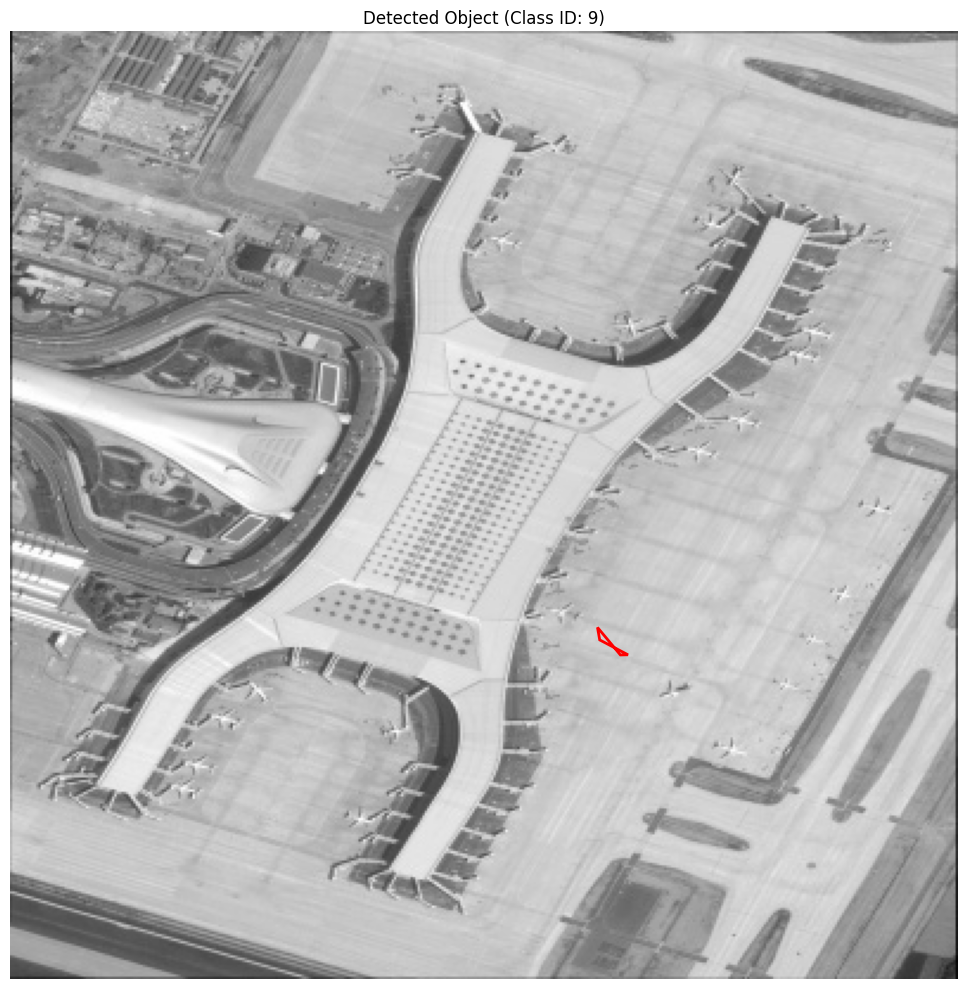

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Load and preprocess the image
image_path = "DOTAv1\\preprocessed_images\\train\\P0000.jpg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Your existing code for prediction
img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img_gray = img_gray.astype(np.float32) / 255.0
img_gray = np.expand_dims(img_gray, axis=(0, -1))
predictions = model.predict(img_gray)
class_probs, bounding_boxes = predictions
class_id = np.argmax(class_probs[0][8])
print("Class ID:", class_id)

# Extract bounding box coordinates
bbox = bounding_boxes[0][8]
x1, y1, x2, y2, x3, y3, x4, y4 = bbox

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(img)

# Create a Polygon patch
polygon = Polygon([(x1*400, y1*400), (x2*400, y2*400), (x3*400, y3*400), (x4*400, y4*400)], 
                  closed=True, fill=False, edgecolor='r', linewidth=2)

# Add the polygon to the plot
ax.add_patch(polygon)

# Set the title
ax.set_title(f"Detected Object (Class ID: {class_id})")

# Remove axis labels
ax.set_axis_off()

# Show the plot
plt.tight_layout()
plt.show()